In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [26]:
df = pd.read_csv(r"C:\Desktop\datasets\digit-recognizer\train.csv")

In [27]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df = np.array(df)
m,n = df.shape        # m = no of rows /examples , n = features + 1 (label col)
np.random.shuffle(df)

df_test_col = df[0:1000].T   # row to col by transposing the matrix so each col is an example
y_row =  df_test_col[0]
X_row = df_test_col[1:n]

data_train = df[1000:m].T
y_train = data_train[0]
X_train = data_train[1:n]
_,m_train = X_train.shape

In [29]:
X_train[:, 0].shape

(784,)

In [30]:
y_train

array([0, 6, 8, ..., 8, 6, 2])

## initialising parameters

In [31]:
def init_params():
  w1 = np.random.rand(10,784) - 0.5     # .rand makes values between 0 and 1 so we sub 0.5 to create values b/w -0.5 to 0.5
  b1 = np.random.rand(10,1) - 0.5
  w2 = np.random.rand(10,10) - 0.5
  b2 = np.random.rand(10,1) - 0.5
  return w1,b1,w2,b2


def ReLU(z):
  return np.maximum(z,0)    # go through each ele in z and return 0 if ele is < 0 and return z if ele > 0.


# def softmax(z):
#   a = np.exp(z) / sum(np.exp(z))
#   return a 

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)  # Normalize to prevent overflow
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)  # Sum along rows (axis=1)


def forward_prop(w1,b1,w2,b2,X):
  z1 = w1.dot(X) + b1
  a1 = ReLU(z1)
  z2 = w2.dot(a1) + b2
  a2 = softmax(z2)
  return z1,a1,z2,a2

def one_hot_encode(y):
  one_hot_y = np.zeros((y.size, y.max()+1))        # y.size = m (num of examples)
  one_hot_y[np.arange(y.size), y] = 1
  one_hot_y = one_hot_y.T
  return one_hot_y


def deriv_ReLU(z):     # works coz when booleans converted to num true =1 /false =0
  return z > 0         # slope 1

def back_prop(z1,a1,z2,a2,w1,w2,X, y):
  m = X.shape[1]  # Assuming X's columns represent examples
  one_hot_y = one_hot_encode(y)
  dz2 = a2 - one_hot_y
  dw2 = 1/m * dz2.dot(a1.T)
  # db2 = 1 / m *np.sum(dz2, 2)
  db2 = 1 / m * np.sum(dz2, axis=1, keepdims=True)  # Summing over rows
  dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
  dw1 = 1 / m * dz1.dot(X.T)
  # db1 = 1 / m * np.sum(dz1)
  db1 = 1 / m * np.sum(dz1, axis=1, keepdims=True)
  return dw1,db1,dw2,db2


def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
  w1 = w1 - alpha*dw1
  b1 = b1 - alpha*db1
  w2 = w2 - alpha*dw2
  b2 = b2 - alpha*db2
  return w1,b1,w2,b2



In [32]:
def get_predictions(a2):
  return np.argmax(a2,0)


In [33]:
def get_accuracy(predictions, y):
  print(predictions,y)
  return np.sum(predictions == y) / y.size

In [34]:
def gradient_descent(X,y,aplha,iterations):
  w1,b1,w2,b2 = init_params()
  for i in range(iterations):
    z1, a1, z2, a2 = forward_prop(w1,b1,w2,b2,X)
    dw1,db1,dw2,db2 = back_prop(z1,a1,z2,a2,w1,w2,X,y)
    w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,aplha)
    if i % 10 ==0:
      print('Iteration: ',i)
      print('Accuracy', get_accuracy(get_predictions(a2),y))
  return w1,b1,w2,b2

In [35]:
w1,b1,w2,b2 = gradient_descent(X_train,y_train,0.1,500)

Iteration:  0
[0 8 5 ... 4 4 9] [0 6 8 ... 8 6 2]
Accuracy 0.1152439024390244
Iteration:  10
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  20
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  30
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  40
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  50
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  60
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  70
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  80
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  90
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147


C:\Users\trang\AppData\Local\Temp\ipykernel_15692\3129000540.py:18: RuntimeWarning: invalid value encountered in subtract
  z = z - np.max(z, axis=1, keepdims=True)  # Normalize to prevent overflow


Iteration:  100
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  110
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  120
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  130
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  140
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  150
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  160
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  170
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  180
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  190
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  200
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  210
[0 0 0 ... 0 0 0] [0 6 8 ... 8 6 2]
Accuracy 0.09841463414634147
Iteration:  220
[0 0 0 ... 0

In [39]:
def make_prediction(X,w1,b1,w2,b2):
    w1,a1,w2,a2 = forward_prop(w1,b1,w2,b2,X)
    predictions = get_predictions(a2)
    return predictions

def get_test_predictions(index, w1, b1, w2, b2):
    curr_img = X_train[:,index, None]
    predict = make_prediction(X_train[:,index,None], w1,b1,w2,b2)
    label = y_train[index]
    print(f'prediction : {predict}')
    print(f'label : {label}')
    
    curr_img = curr_img.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(curr_img, interpolation='nearest')
    plt.show()

prediction : [0]
label : 7


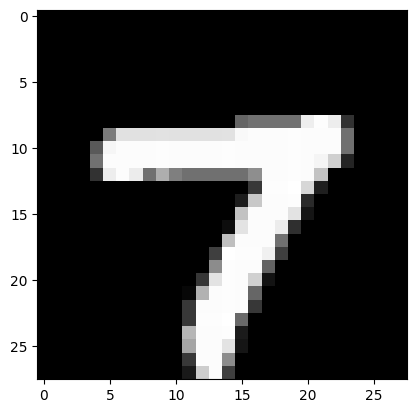

In [40]:
get_test_predictions(5,w1,b1,w2,b2)

prediction : [0]
label : 8


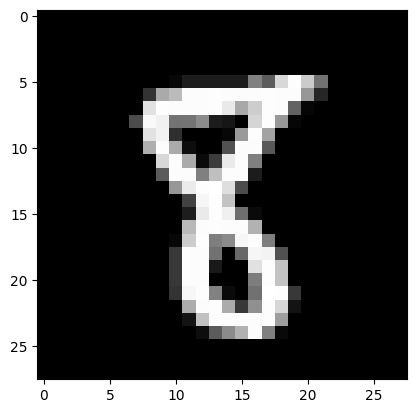

In [41]:
get_test_predictions(3,w1,b1,w2,b2)

prediction : [0]
label : 6


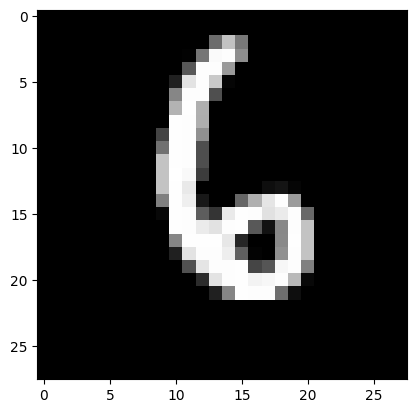

In [42]:
get_test_predictions(15,w1,b1,w2,b2)